# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
#Importing The Required Libraries & Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [2]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [3]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


# Exploratory Data Analysis (EDA)


In [5]:
df.shape


(7588, 2)

In [6]:
df.isnull().sum()


date       0
Ex_rate    0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
df.dtypes


date        object
Ex_rate    float64
dtype: object

In [9]:
df.describe()


,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


# Data Preprocessing

In [11]:
#Changing the data type of Date column as Date using pandas command
df['date'] = pd.to_datetime(df['date'])


In [12]:
#Changing the Date columns as the index column of the dataset and also displaying the first five records of the dataset
df.set_index('date',inplace = True)

# Data Processing & Visualization

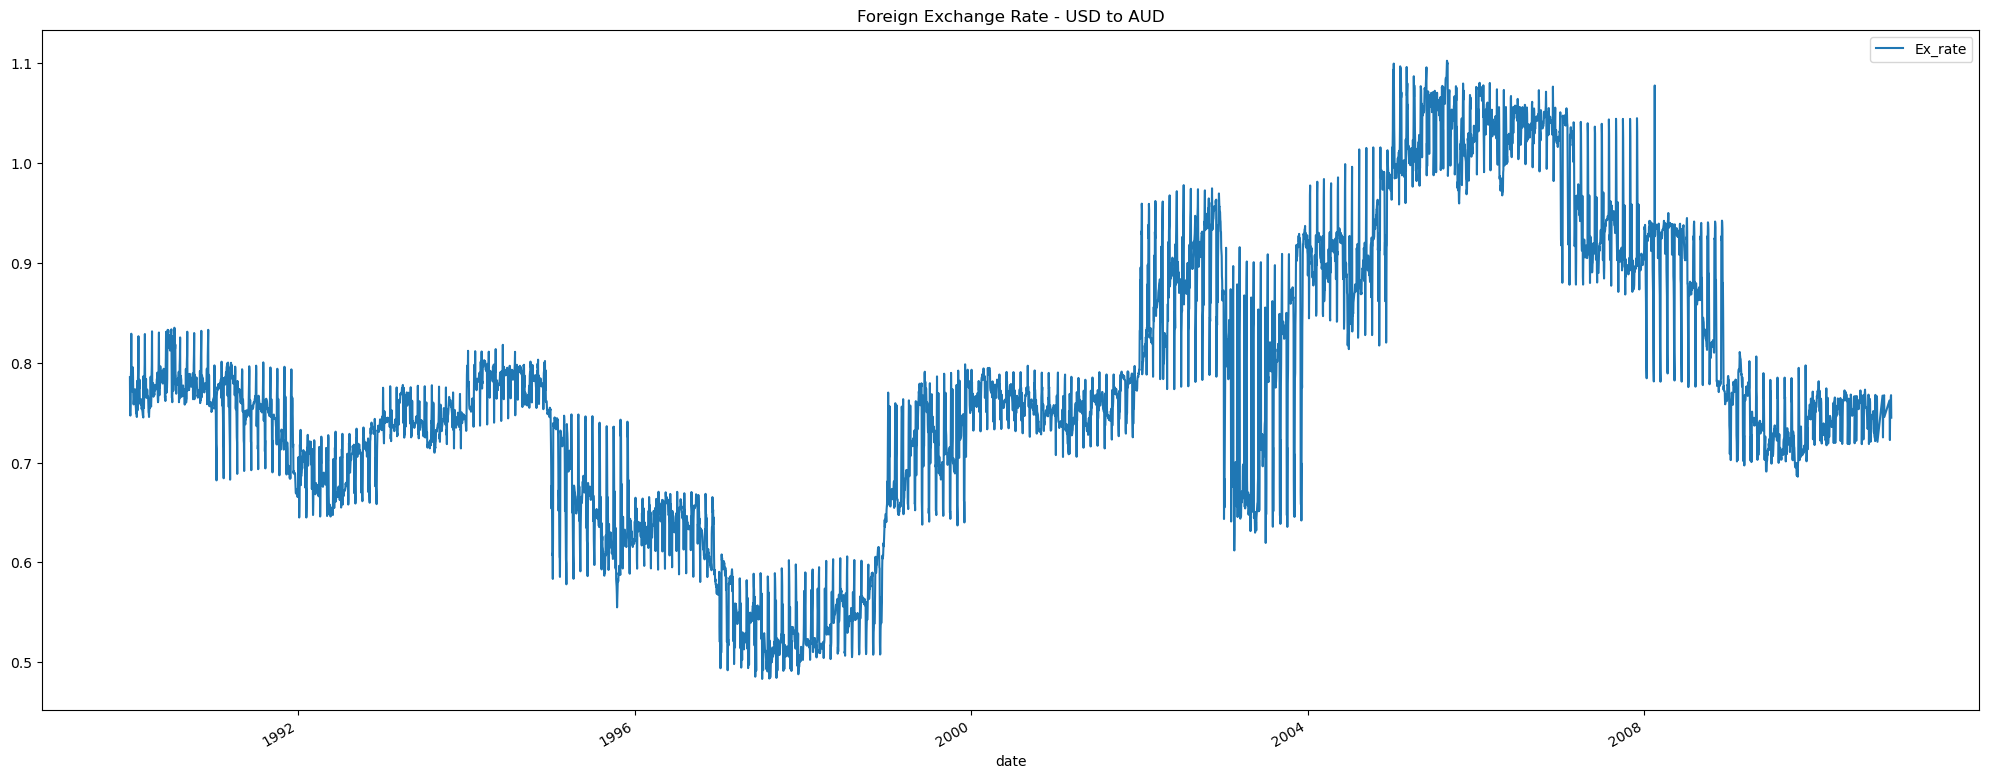

In [17]:
#Plotting the line graph to show the data trend in the dataset 

df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [19]:
#Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to
#fit or predict the model. And along with that showing number of observation after resampling and displaying the first five
#record of resampled dataset

In [20]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1093


,Ex_rate
date,
1990-01-07,0.778300
1990-01-14,0.781486
1990-01-21,0.764871
1990-01-28,0.762429
1990-02-04,0.757243


In [21]:
#Plotting the line graph to show the data trend in the weekly resampled dataset 

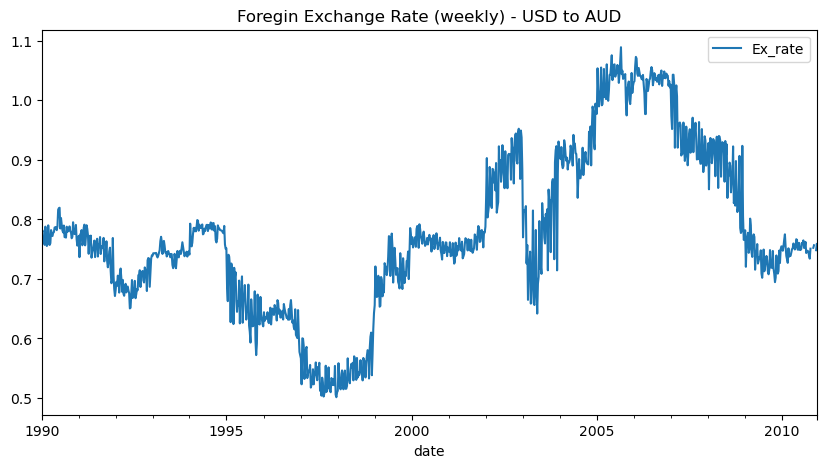

In [22]:
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - USD to AUD')
plt.show()

Resampling the dataset to monthly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset

In [23]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  252


,Ex_rate
date,
1990-01-31,0.769661
1990-02-28,0.765589
1990-03-31,0.768568
1990-04-30,0.777073
1990-05-31,0.784868


In [24]:
#Plotting the line graph to show the data trend in the monthly resampled dataset

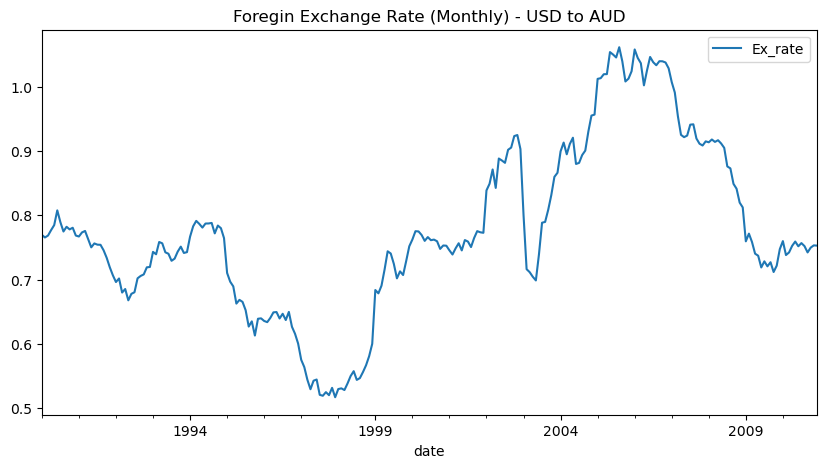

In [25]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - USD to AUD')
plt.show()

Resampling the dataset to yearly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset

In [26]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  21


,Ex_rate
date,
1990-12-31,0.778996
1991-12-31,0.749830
1992-12-31,0.695201
1993-12-31,0.743442
1994-12-31,0.781024


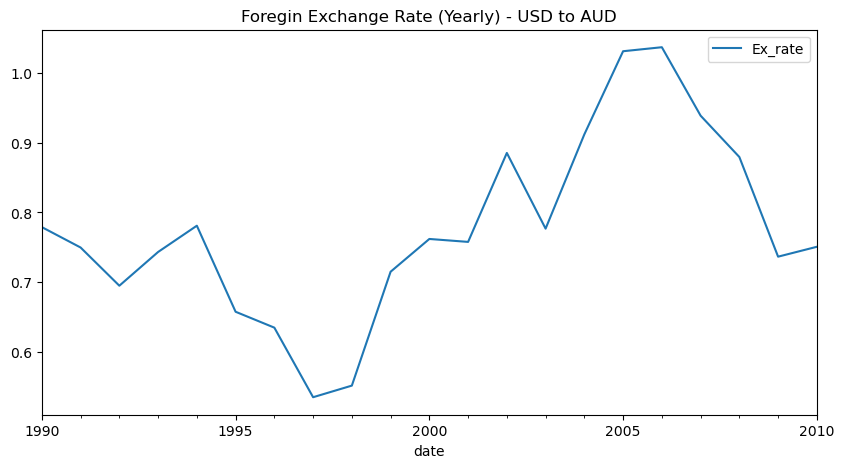

In [27]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - USD to AUD')
plt.show()

Plotting the scatter plot to show the data trend in the weekly resampled dataset. And by observing all the above resampled graph , weekly resampled data has more clear peak and perks among all resample data

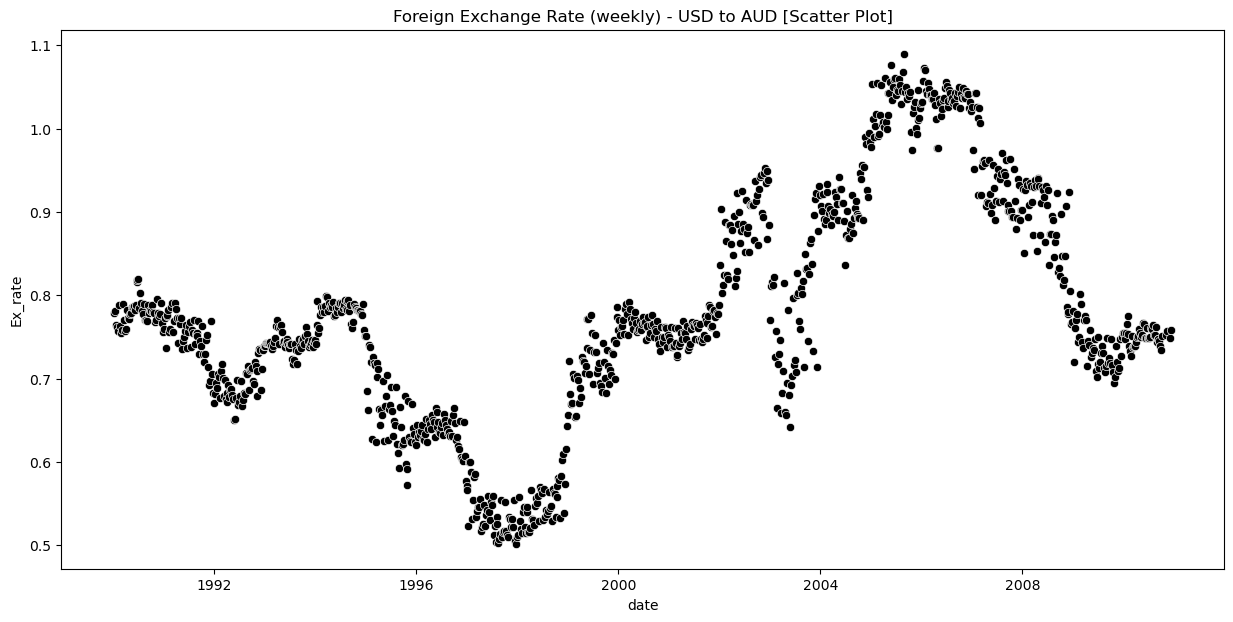

In [29]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_week.index , y = df_week.Ex_rate , color = 'black')
plt.title('Foreign Exchange Rate (weekly) - USD to AUD [Scatter Plot]')
plt.show()

In [30]:
#Plotting the dist plot using seaborn to show the data spread in the resampled weekly dataset

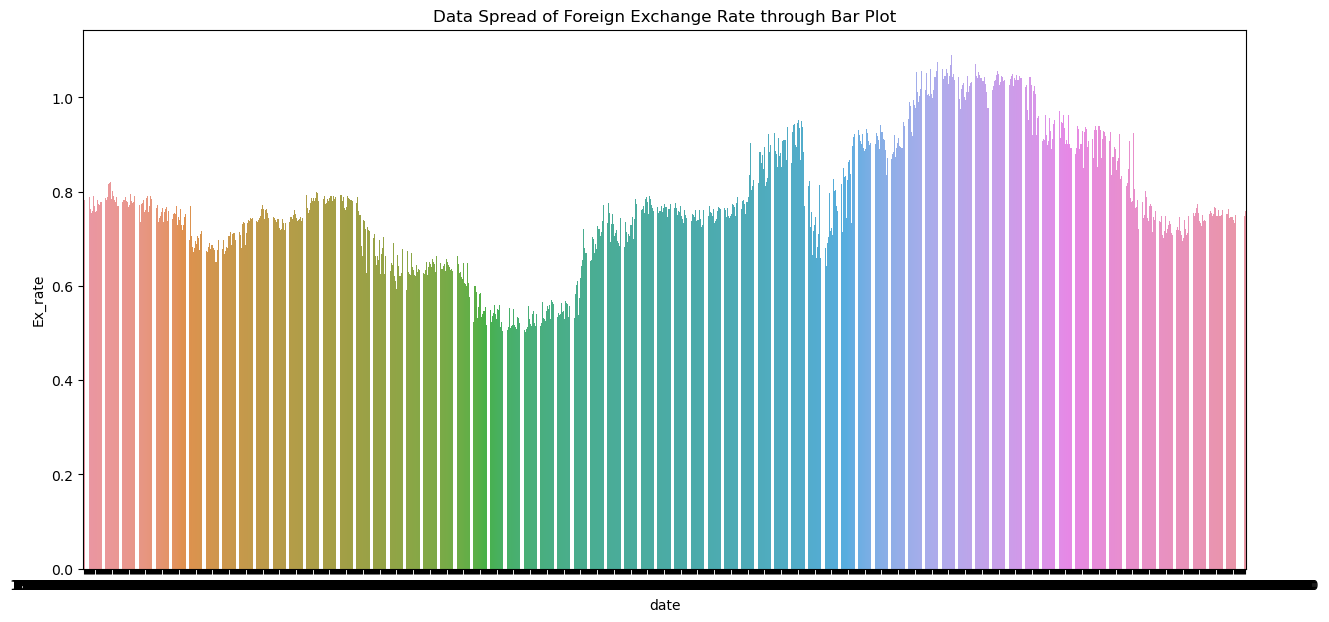

In [31]:
sns.barplot(data = df_week,x = df_week.index , y = df_week.Ex_rate)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.show()

In [32]:
#Plotting the dist plot using seaborn to show the data distribution in the resampled weekly dataset.

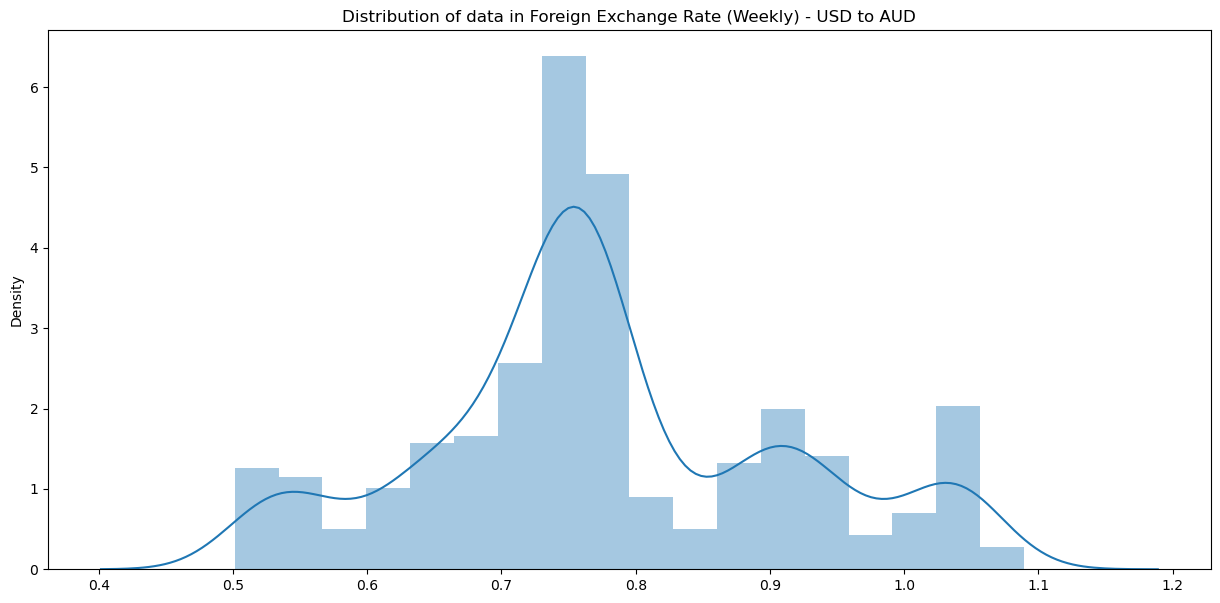

In [33]:
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - USD to AUD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD.png')
plt.show()

In [34]:
#Plotting the histogram and KDE line graph to show the distribution of data in the dataset.

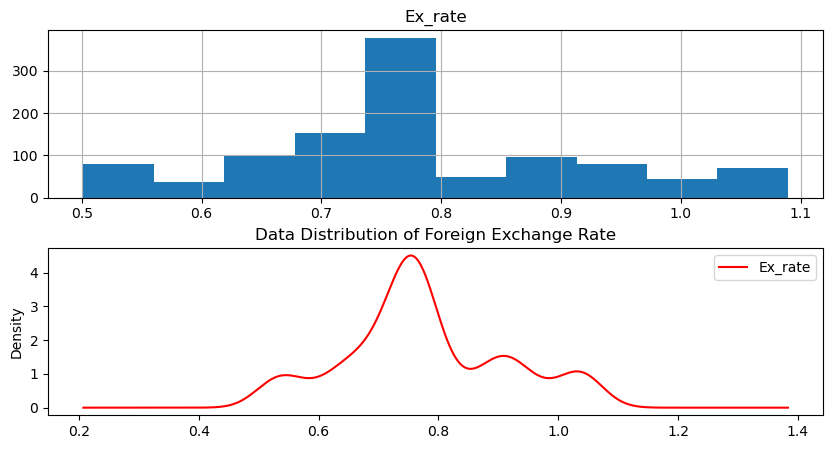

In [35]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

In [36]:
#Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal , residuals

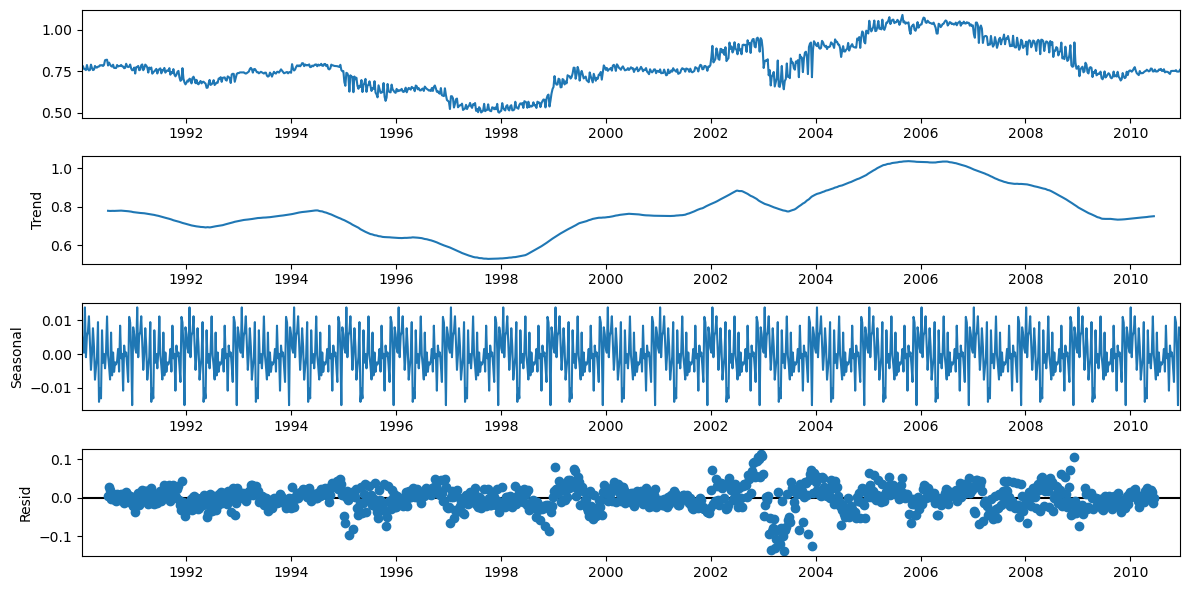

In [39]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week.fillna(method='bfill'), period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

In [40]:
#Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset and saving the graph as PNG file

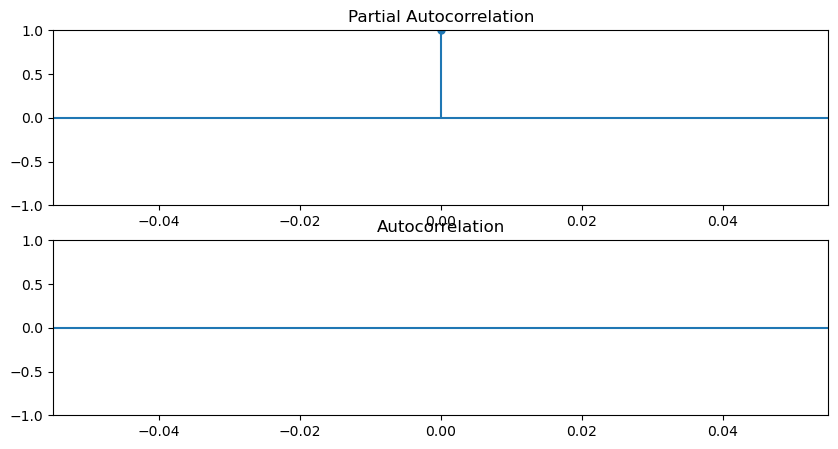

In [43]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

# Data Transformation

In [44]:
'''
The adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.
'''

'\nThe adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.\n'

In [47]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Ex_rate    5
dtype: int64


In [48]:
# Check for infinite values
infinite_values = np.isinf(df_week).sum()
print(infinite_values)

Ex_rate    0
dtype: int64


In [49]:
# Remove rows with missing values
df_week = df_week.dropna()

In [50]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Ex_rate    0
dtype: int64


In [51]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

#Performing the Augmented Dickey Fuller Test on the original data in the resampled weekly dataset to find whether the time series is a stationary or not

In [52]:
adf_check(df_week)


Test Statistic                   -1.808866
p-value                           0.376069
Number of Lags Used              22.000000
Number of Observations Used    1065.000000
Critical Value (1%)              -3.436505
Critical Value (5%)              -2.864258
Critical Value (10%)             -2.568217
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


Since the time series is not a stationary , the resampled weekly dataset is transformed as a new dataframe with first difference to make it as a stationary series. Along with that showing number of observation in the new dataframe and displaying the first five record of the new data frame

In [53]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 1087


,Ex_rate
date,
1990-01-14,0.003186
1990-01-21,-0.016614
1990-01-28,-0.002443
1990-02-04,-0.005186
1990-02-11,0.030600


Performing the Augmented Dickey Fuller Test on the new transformed data in the resampled weekly dataset to find whether the time series is a stationary or not

In [54]:
adf_check(df1_week)


Test Statistic                -5.898755e+00
p-value                        2.810497e-07
Number of Lags Used            2.100000e+01
Number of Observations Used    1.065000e+03
Critical Value (1%)           -3.436505e+00
Critical Value (5%)           -2.864258e+00
Critical Value (10%)          -2.568217e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


In [55]:
#Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset and saving the graph as PNG File

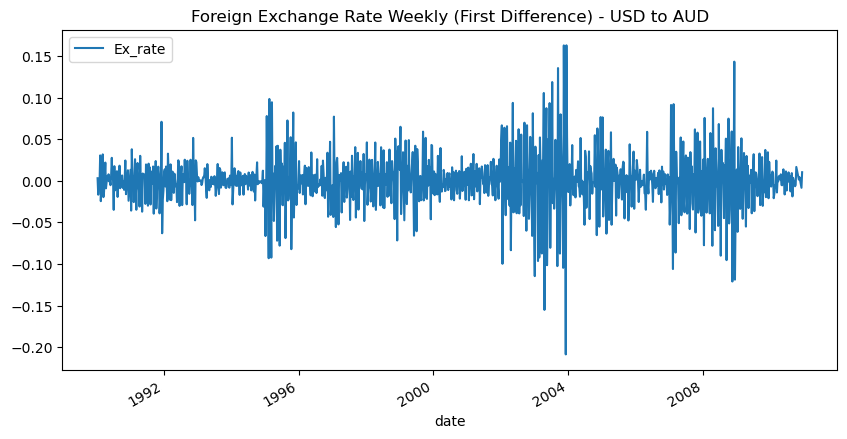

In [56]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - USD to AUD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference) - USD to AUD.png')
plt.show()

@Plotting the graph with pandas auto correlation plot to show the difference between the stationary data and non - stationary data and saving it as png file.

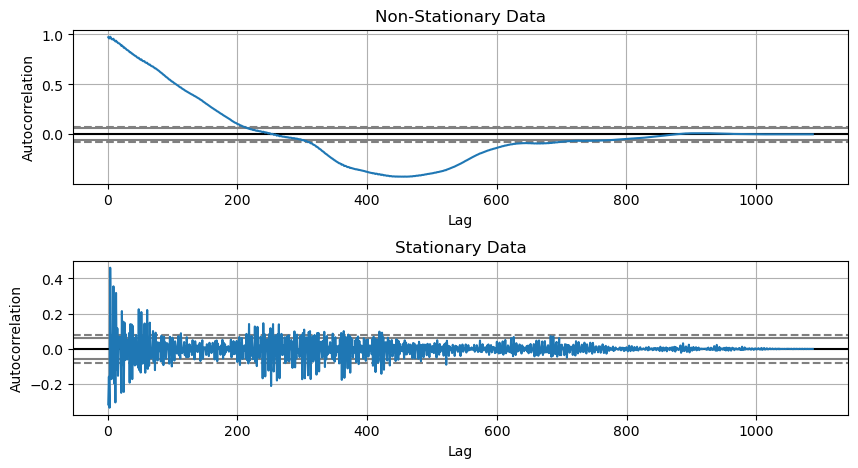

In [57]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

# Model Fitting

Getting the p value and q value for the model fitting using auto_arima function by passing through some needed parameters , the best model is evaluated by least Akaike Information Criterion (AIC)

In [58]:
model = auto_arima(df_week , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4938.189, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4433.972, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4545.126, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4749.536, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4435.972, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4759.870, Time=2.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4811.293, Time=2.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5108.381, Time=2.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5090.030, Time=2.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-5089.642, Time=3.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5108.028, Time=3.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4890.798, Time=2.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-5093.269, Time=2.41 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-5105.850, Time=4.11 sec
 ARIMA(3,1,2)(0,0,0

Defining the summary of the model fitted with auto_arima function , here getting various information such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) , Hannan-Quinn Information Criterion (HQIC), Log Likelihood etc. From which we can evaluate the model

In [59]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1088
Model:               SARIMAX(5, 1, 2)   Log Likelihood                2586.179
Date:                Tue, 14 May 2024   AIC                          -5156.359
Time:                        23:18:23   BIC                          -5116.429
Sample:                             0   HQIC                         -5141.244
                               - 1088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4978      0.029    -16.992      0.000      -0.555      -0.440
ar.L2          0.1959      0.034      5.697      0.000       0.129       0.263
ar.L3         -0.1605      0.020     -8.152      0.000      -0.199      -0.122
ar.L4          0.5651      0.024     23.557      0.000       0.518       0.612
ar.L5          0.6996      0.019     36.553      0.000       0.662       0.737
ma.L1          0.0117      0.030      0.392      0.695      -0.047       0.070
ma.L2         -0.7317      0.035    -20.828      0.000      -0.801      -0.663
sigma2         0.0005   1.35e-05     37.297      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               767.17
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model = ARIMA(df_week , order = (5,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 1088
Model:                 ARIMA(5, 1, 2)   Log Likelihood                2586.179
Date:                Tue, 14 May 2024   AIC                          -5156.359
Time:                        23:19:42   BIC                          -5116.429
Sample:                             0   HQIC                         -5141.244
                               - 1088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4978      0.029    -16.992      0.000      -0.555      -0.440
ar.L2          0.1959      0.034      5.697      0.000       0.129       0.263
ar.L3         -0.1605      0.020     -8.152      0.000      -0.199      -0.122
ar.L4          0.5651      0.024     23.557      0.000       0.518       0.612
ar.L5          0.6996      0.019     36.553      0.000       0.662       0.737
ma.L1          0.0117      0.030      0.392      0.695      -0.047       0.070
ma.L2         -0.7317      0.035    -20.828      0.000      -0.801      -0.663
sigma2         0.0005   1.35e-05     37.297      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               767.17
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
#Plotting the diagnostic plot for the fitted model to show the best fit of the model and saving it as png file



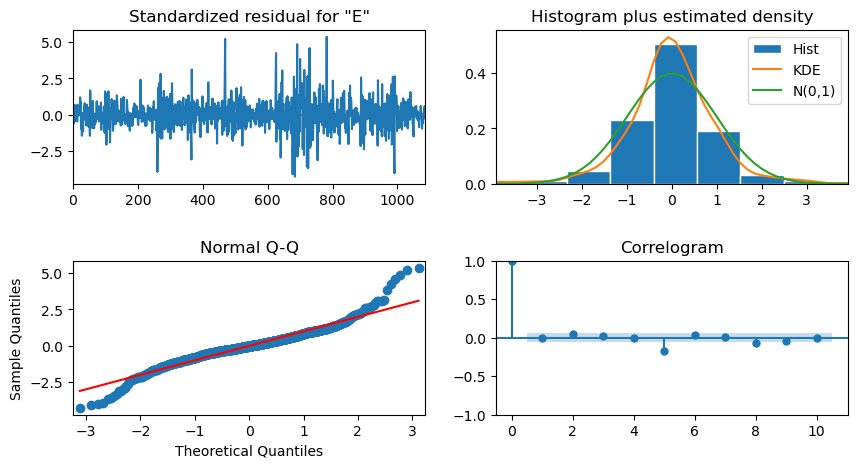

In [62]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [63]:
#Predicting the value using fitted model with whole resampled weekly data



In [64]:
predictions = result.predict(typ = 'levels')


# Model Evaluation

Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and whole data value.

In [65]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Ex_rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 94.15 % 

Mean Squared Error :  0.001057213101492129 

Mean Absolute Error :  0.016428291139565204 

Root Mean Squared Error :  0.03251481357000419 

Mean Absolute Percentage Error : 2.15 %


# Result

Concating the Resampled weekly dataset and weekly first difference dataframe and the prediction value and naming the columns as Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate and exporting the dataframe to [Comma Seperated Value (CSV)] file. Also displaying the first five records of the exported dataframe.

In [66]:
Final_data = pd.concat([df_week,df1_week,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (USD to AUD).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
date,,,
1990-01-07,0.778300,NaN,0.000000
1990-01-14,0.781486,0.003186,0.778300
1990-01-21,0.764871,-0.016614,0.781208
1990-01-28,0.762429,-0.002443,0.765383
1990-02-04,0.757243,-0.005186,0.771924


# Model Testing

In [67]:
#Splliting the Resampled Weekly Dataset into training data and test data. Displaying the number of observations in both training data and test data.

In [68]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Ex_rate'] , df_week[size:(len(df_week))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  870
Counts of Train Data :  218


In [69]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 1.037642 , Actual = 1.026845
Predicted = 1.033674 , Actual = 1.039438
Predicted = 1.035792 , Actual = 1.044465
Predicted = 1.038980 , Actual = 1.050142
Predicted = 1.043083 , Actual = 1.024233
Predicted = 1.036156 , Actual = 1.041322
Predicted = 1.038054 , Actual = 1.037256
Predicted = 1.037761 , Actual = 1.048507
Predicted = 1.041708 , Actual = 1.038061
Predicted = 1.040368 , Actual = 1.037079
Predicted = 1.039160 , Actual = 1.044990
Predicted = 1.041302 , Actual = 1.041232
Predicted = 1.041276 , Actual = 1.041508
Predicted = 1.041361 , Actual = 1.024570
Predicted = 1.035194 , Actual = 1.032355
Predicted = 1.034151 , Actual = 1.021559
Predicted = 1.029524 , Actual = 1.026367
Predicted = 1.028363 , Actual = 0.973774
Predicted = 1.008260 , Actual = 0.951832
Predicted = 0.987219 , Actual = 1.043060
Predicted = 1.007953 , Actual = 1.043040
Predicted = 1.020819 , Actual = 1.026396
Predicted = 1.022866 , Actual = 0.920403
Predicted = 

Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data.

In [70]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 92.55 % 

Mean Squared Error :  0.0008223232837164639 

Mean Absolute Error :  0.02060295049310079 

Root Mean Squared Error :  0.028676179726673214 

Mean Absolute Percentage Error : 2.43 %


Making the predicted value as series and index as same as Test Data index since the prediction is based on test data



In [71]:
predictions_df = pd.Series(prediction, index = test.index)


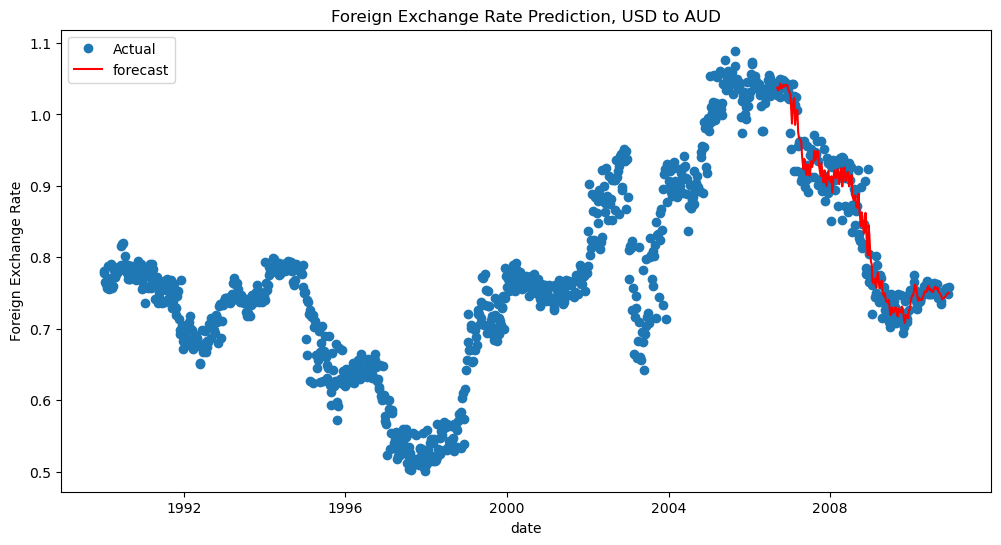

In [72]:
#Plotting the graph with predicted data and resampled weekly data index since the prediction is based on test data.

plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, USD to AUD', xlabel='date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction - USD to AUD.png')

In [73]:
#End of the program